In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv("../Datasets/train.csv",usecols=["Age","Fare","Survived"])
df.sample(5)

,Survived,Age,Fare
53,1,29.0,26.0000
798,0,30.0,7.2292
737,1,35.0,512.3292
681,1,27.0,76.7292
658,0,23.0,13.0000


In [55]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

In [57]:
mean_age=X_train["Age"].mean()
median_age=X_train["Age"].median()

In [58]:
X_train["Age_mean"]=X_train["Age"].fillna(mean_age)
X_train["Age_median"]=X_train["Age"].fillna(median_age)
X_train.sample(5)

,Survived,Age,Fare,Age_mean,Age_median
751,1,6.0,12.475,6.0000,6.0
880,1,25.0,26.000,25.0000,25.0
570,1,62.0,10.500,62.0000,62.0
183,1,1.0,39.000,1.0000,1.0
459,0,NaN,7.750,29.5313,28.0


In [59]:
X_train.isnull().mean()*100

Survived       0.000000
Age           18.263473
Fare           0.000000
Age_mean       0.000000
Age_median     0.000000
dtype: float64

In [60]:
# checking changes in variance due to mean/median filling
print("Orignal Variance ",X_train["Age"].var())
print("New Variance age_mean",X_train["Age_mean"].var())
print("New Variance age_median",X_train["Age_median"].var())

Orignal Variance  209.9919783059448
New Variance age_mean 171.58265093964008
New Variance age_median 171.93321787317416


C:\Users\panka\AppData\Local\Temp\ipykernel_43484\1125784718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
C:\Users\panka\AppData\Local\Temp\ipykernel_43484\1125784718.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

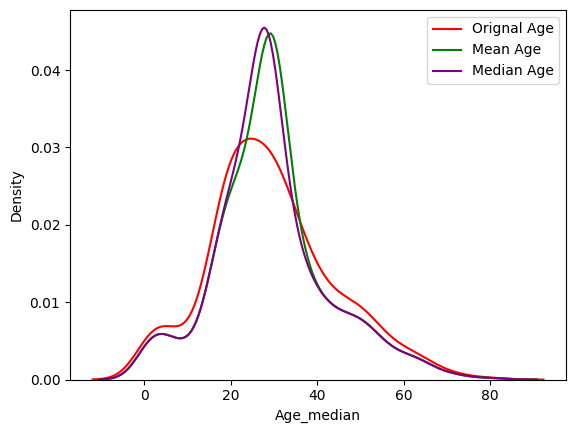

In [61]:
sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
sns.distplot(X_train["Age_mean"],color="green",hist=False,label="Mean Age")
sns.distplot(X_train["Age_median"],color="purple",hist=False,label="Median Age")
plt.legend()

<Axes: >

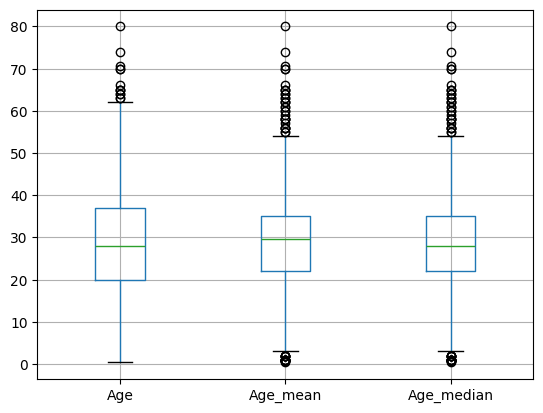

In [62]:
X_train[["Age","Age_mean","Age_median"]].boxplot()

In [63]:
# applying mean/median imputation by sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)


si1=SimpleImputer(strategy="mean")
si2=SimpleImputer(strategy="median")
trf1=ColumnTransformer(
    transformers=[
    ("tnf1",si1,["Age"])],
    remainder="passthrough"
)
 
trf2=ColumnTransformer(
    transformers=[
    ("tnf1",si2,["Age"])],
    remainder="passthrough"
)

trf1.fit(X_train)
trf2.fit(X_train)

X_train_trf1=trf1.transform(X_train)
X_train_trf2=trf2.transform(X_train)

X_test_trf1=trf1.transform(X_test)
X_test_trf2=trf2.transform(X_test)

## arbitary value filling

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

X_train["Age_filled"]=X_train["Age"].fillna(99)

print("Orignal Variance ",X_train["Age"].var())
print("New Variance ",X_train["Age_filled"].var())



Orignal Variance  218.65326532639315
New Variance  923.0436555734857


In [65]:
# by sckit learn
X_train,X_test=train_test_split(df,test_size=0.25)
                                
si1=SimpleImputer(strategy="constant",fill_value=99)
trf1=ColumnTransformer(
    transformers=[
    ("tnf1",si1,["Age"])],
    remainder="passthrough"
)

trf1.fit(X_train)

X_train_trf1=trf1.transform(X_train)
X_test_trf1=trf1.transform(X_test)


# by Random values

In [66]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

In [67]:
X_train["Age Imputed"]=X_train["Age"]
X_test["Age Imputed"]=X_test["Age"]

In [72]:
# For X_train
missing_train = X_train["Age Imputed"].isnull()
X_train.loc[missing_train, "Age Imputed"] = X_train["Age"].dropna().sample(missing_train.sum(), replace=True).values

# For X_test
missing_test = X_test["Age Imputed"].isnull()
X_test.loc[missing_test, "Age Imputed"] = X_train["Age"].dropna().sample(missing_test.sum(), replace=True).values

# X_test.loc[missing_test, "Age Imputed"] = X_train["Age"].dropna().sample(missing_test.sum(), replace=True,random_state=int(X_train["Fare"]).values
# it will give same output for a given fare

C:\Users\panka\AppData\Local\Temp\ipykernel_43484\2608490835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
C:\Users\panka\AppData\Local\Temp\ipykernel_43484\2608490835.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

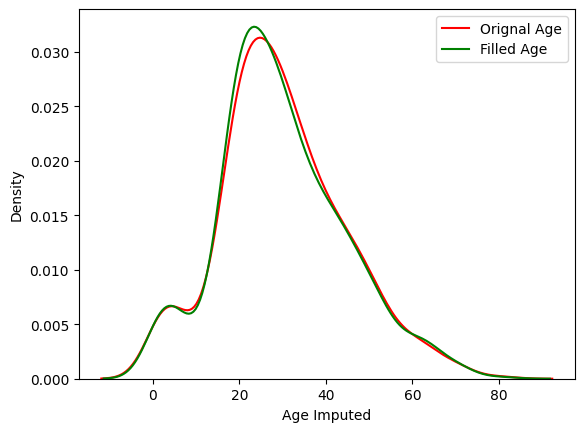

In [69]:
sns.distplot(X_train["Age"],color="red",hist=False,label="Orignal Age")
sns.distplot(X_train["Age Imputed"],color="green",hist=False,label="Filled Age")
plt.legend()

In [70]:
# checking changes in variance due to random
print("Orignal Variance ",X_train["Age"].var())
print("New Variance age_mean",X_train["Age Imputed"].var())

Orignal Variance  206.6356520265511
New Variance age_mean 207.32603303625135


In [71]:
X_train.cov()

,Survived,Age,Fare,Age Imputed
Survived,0.232597,-0.661186,6.599347,-0.615156
Age,-0.661186,206.635652,83.541438,206.635652
Fare,6.599347,83.541438,2764.726991,76.504875
Age Imputed,-0.615156,206.635652,76.504875,207.326033


# Missing Indicator

In [87]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)


In [88]:
si=SimpleImputer(add_indicator=True)
X_train=si.fit_transform(X_train)
X_test=si.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=list(df.columns)+["Age Missing indicator"])
X_train


,Survived,Age,Fare,Age Missing indicator
0,0.0,30.094045,24.1500,1.0
1,0.0,30.094045,14.5000,1.0
2,0.0,21.000000,77.2875,0.0
3,0.0,18.000000,11.5000,0.0
4,0.0,30.094045,7.7375,1.0
...,...,...,...,...
663,1.0,14.000000,30.0708,0.0
664,1.0,4.000000,22.0250,0.0
665,0.0,30.094045,7.2250,1.0
666,0.0,21.000000,73.5000,0.0


In [93]:
# we can also use missing indicator class for the same
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)

from sklearn.impute import MissingIndicator

mi=MissingIndicator()
# mi.fit(X_train["Age"])
X_train=mi.fit_transform(X_train[["Age"]])
X_test=mi.fit_transform(X_test[["Age"]])
X_test

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

# Categorical Data

In [14]:
df=pd.read_csv("../Datasets/AmesHousing.csv",usecols=["Fireplace Qu","Garage Qual","SalePrice"])
df.head()

,Fireplace Qu,Garage Qual,SalePrice
0,Gd,TA,215000
1,NaN,TA,105000
2,NaN,TA,172000
3,TA,TA,244000
4,TA,TA,189900


In [15]:
df.isnull().mean()*100

Fireplace Qu    48.532423
Garage Qual      5.426621
SalePrice        0.000000
dtype: float64

<Axes: xlabel='Garage Qual', ylabel='Count'>

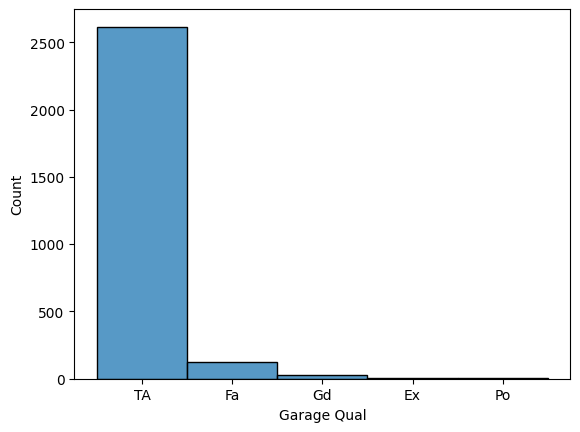

In [16]:
sns.histplot(df["Garage Qual"])

<Axes: xlabel='Fireplace Qu', ylabel='Count'>

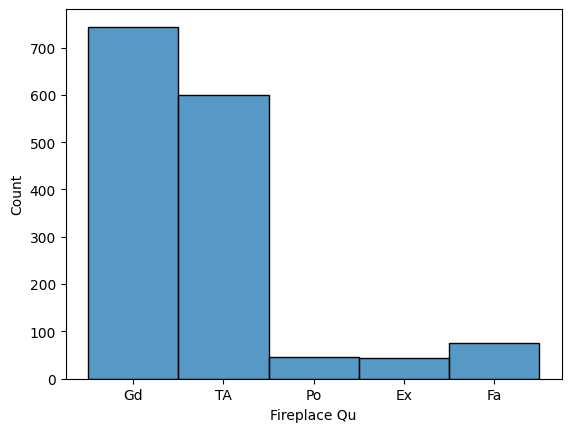

In [17]:
sns.histplot(df["Fireplace Qu"])

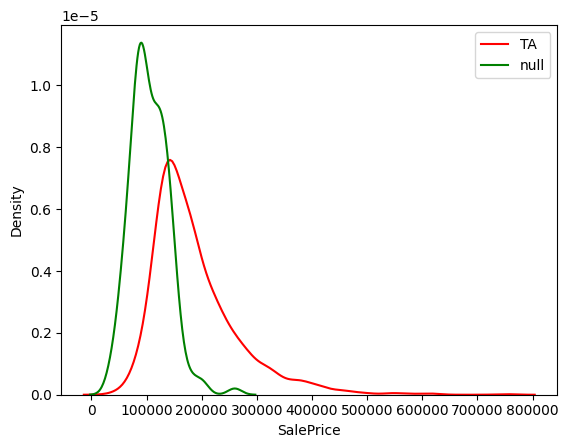

In [18]:
sns.kdeplot(x=df[df["Garage Qual"]=="TA"]["SalePrice"],color="red",label="TA")
sns.kdeplot(x=df[df["Garage Qual"].isnull()]["SalePrice"],color="green",label="null")
plt.legend()
x=df[df["Garage Qual"]=="TA"]["SalePrice"]

In [19]:
df["Garage Qual"].fillna("TA",inplace=True)
# filling with mode

C:\Users\panka\AppData\Local\Temp\ipykernel_43484\592166269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Garage Qual"].fillna("TA",inplace=True)


<Axes: xlabel='SalePrice', ylabel='Density'>

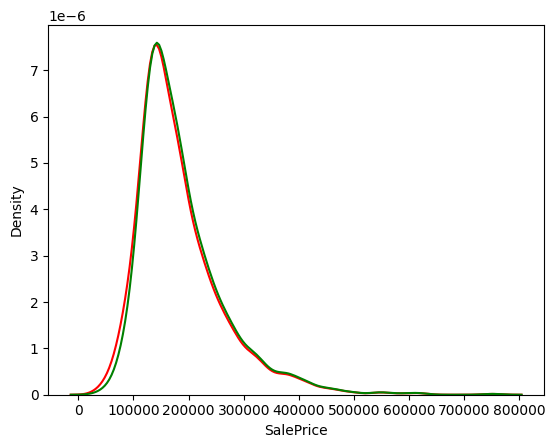

In [20]:
sns.kdeplot(x=df[df["Garage Qual"]=="TA"]["SalePrice"],color="red",label="new TA")
sns.kdeplot(x,color="green",label="prev TA")
# perfect because one category is in very laarage no than others

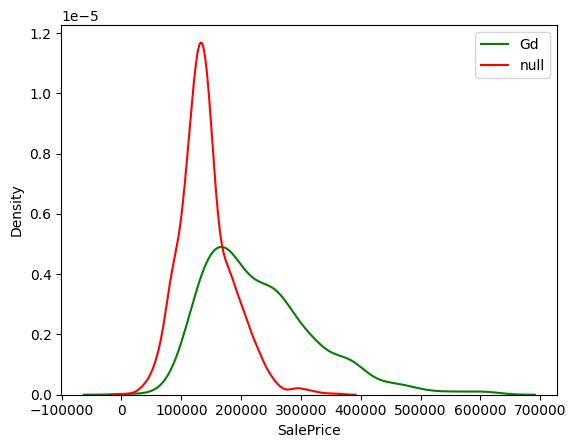

In [21]:
sns.kdeplot(x=df[df["Fireplace Qu"]=="Gd"]["SalePrice"],color="green",label="Gd")
sns.kdeplot(x=df[df["Fireplace Qu"].isnull()]["SalePrice"],color="red",label="null")
plt.legend()
x=df[df["Fireplace Qu"]=="Gd"]["SalePrice"]

In [22]:
df["Fireplace Qu"].fillna("Gd",inplace=True)
# filling with mode

C:\Users\panka\AppData\Local\Temp\ipykernel_43484\3083499930.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fireplace Qu"].fillna("Gd",inplace=True)


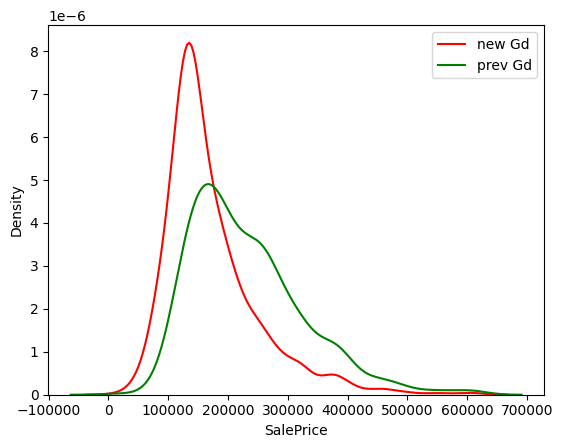

In [23]:
sns.kdeplot(x=df[df["Fireplace Qu"]=="Gd"]["SalePrice"],color="red",label="new Gd")
sns.kdeplot(x,color="green",label="prev Gd")
plt.legend()
# not perfect because one category is not in  very laarage no than others

In [24]:
# using sckit learn 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)


si1=SimpleImputer(strategy="most_frequent")
trf1=ColumnTransformer(
    transformers=[
    ("tnf1",si1,["Fireplace Qu","Garage Qual"])],
    remainder="passthrough"
)


trf1.fit(X_train)

X_train_trf1=trf1.transform(X_train)
X_test_trf1=trf1.transform(X_test)

In [94]:
# filling using missing col

df=pd.read_csv("../Datasets/AmesHousing.csv",usecols=["Fireplace Qu","Garage Qual","SalePrice"])
df.head()

df["Garage Qual"].fillna("Missing",inplace=True)

# by sckit learn

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.25)


si1=SimpleImputer(strategy="constant",fill_value="Missing")
trf1=ColumnTransformer(
    transformers=[
    ("tnf1",si1,["Fireplace Qu","Garage Qual"])],
    remainder="passthrough"
)


trf1.fit(X_train)

X_train_trf1=trf1.transform(X_train)
X_test_trf1=trf1.transform(X_test)

C:\Users\panka\AppData\Local\Temp\ipykernel_3204\1339447499.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Garage Qual"].fillna("Missing",inplace=True)
